In [307]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.datasets import make_regression

In [329]:
calc_mse = lambda y, y_pred: np.mean((y - y_pred)**2)

def eval_model(X, y, iterations=1e+6, alpha=1e-3, eps=1e-8, l1_alpha=0, l2_alpha=0, callback=None):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_prev, err_diff, i = 0, np.inf, 0
    while err_diff > eps and i < iterations:
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        err_diff , err_prev = abs(err_prev - err), err
        l1_term = l1_alpha * np.sign(W) if l1_alpha else 0
        l2_term = l2_alpha * W if l2_alpha else 0 
        W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)) + l1_term + l2_term)
        if callback:
            callback(W=W, i=i, err=err)
        i += 1
    return W


def eval_sgd_model(X, y, n_batch=3, iterations=1e+5, alpha=1e-3, eps=1e-8, callback=None):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_prev, err_diff, i = 0, np.inf, 0
    
    def split(n):
        batch, rem = divmod(X.shape[1], n) 
        for i in range(0, X.shape[1] - rem, batch):
            begin, end = i + min(i, rem), i + batch + min(i + batch, rem)
            yield X[:, begin:end], y[begin:end]
            
    while err_diff > eps and i < iterations:
        for X_batch, y_batch in split(n_batch):
            y_batch_pred = np.dot(W, X_batch)
            W -= (alpha * (1/n * 2 * np.sum(X_batch * (y_batch_pred - y_batch), axis=1)))
            y_pred = np.dot(W, X)    
            err = calc_mse(y, y_pred)
            err_diff , err_prev = abs(err_prev - err), err
            if callback:
                callback(W=W, i=i, err=err)
        i += 1
    return W


def print_w(W, i, err):
    if i % 10000 == 0:
        print(W, err)
    

In [305]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).astype('float')

y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [306]:
scaler = StandardScaler()
X[1:] = scaler.fit_transform(X[1:].T).T
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

<H2>Задание 1</H2>
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [318]:
X_2, y_2 = make_regression(n_features=10, n_samples=1000, random_state=42)

In [330]:
eval_mse_iter = []
eval_sgd_mse_iter = []

def collect_eval_mse(err, **kwargs):
     eval_mse_iter.append(err)
        
def collect_eval_sgd_mse(err, **kwargs):
     eval_sgd_mse_iter.append(err)
    
eval_model(X_2.T, y_2, callback=collect_eval_mse)
eval_sgd_model(X_2.T, y_2, callback=collect_eval_sgd_mse)

array([32.12434212, 76.32834415, 33.6917284 ,  9.42818357,  5.16574961,
       58.28673694, 29.43431643,  7.18124   , 10.30225533, 75.31936733])

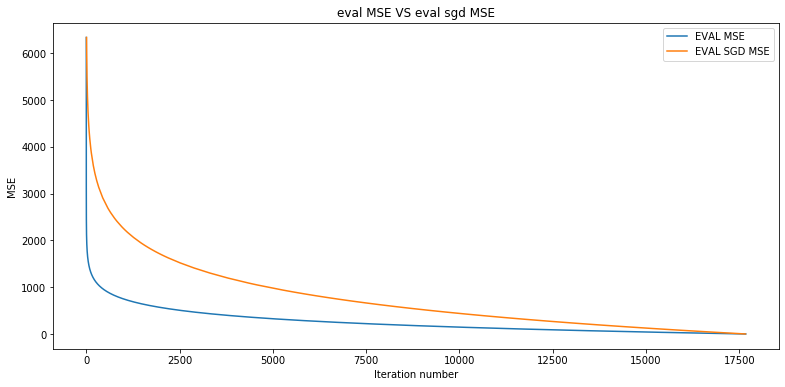

In [338]:
plt.figure(figsize=(13, 6))
plt.title('eval MSE VS eval sgd MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

min_len = min(len(eval_mse_iter), len(eval_sgd_mse_iter))
plt.plot(eval_mse_iter[:min_len], range(1, min_len + 1), label='EVAL MSE')
plt.plot(eval_sgd_mse_iter[:min_len], range(1, min_len + 1), label='EVAL SGD MSE')
plt.legend()
plt.show()

<h2>Задание 2</h2>
Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

***Ответ***<br>
Добавлено в функции. см. описание.

<h2>Задание 3</h2>
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [339]:
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [391]:
l2_weigths = []
l2_vals = []
l2_alpha = 0.1
while l2_alpha > 1e-5:
    l2_weigths.append(eval_model(X, y, l2_alpha=l2_alpha))
    l2_vals.append(l2_alpha)
    l2_alpha /= 1.3

In [392]:
l2_weigths = np.array(l2_weigths)
l2_weigths.shape

(36, 4)

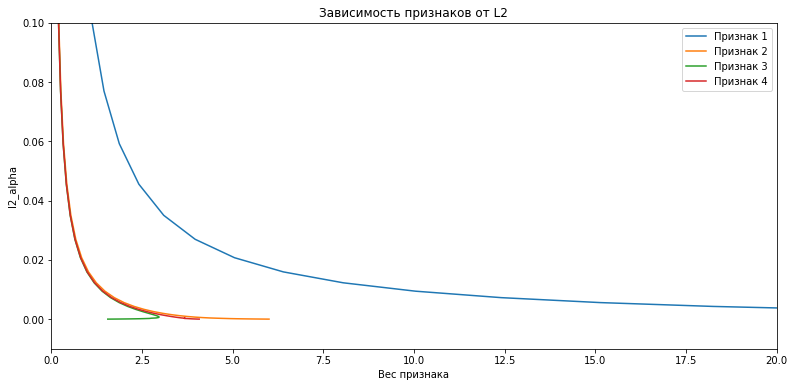

In [410]:
plt.figure(figsize=(13, 6))
for feat in range(l2_weigths.shape[1]):
    plt.plot(l2_weigths[:, feat], l2_vals, label=f'Признак {feat + 1}')
plt.xlim([0, 20])
plt.ylim([-0.01, 1e-1])
plt.title('Зависимость признаков от L2')
plt.xlabel('Вес признака')
plt.ylabel('l2_alpha')
plt.legend()
plt.show()

<h2>Задание 4</h2>
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

***Ответ***<br>
Нормализация отображает признаки на отрезок [0.1], при этом будут сохранены все пропорции, т.е. просле применения стандартизации к нормализованным данным, мы получим тот же рузельтат, если бы применяли стандартизацию без применения нормализации<br>
Аналогично и в другой последовательности стандартизация -> нормальлизация.

<h2>Задание 5</h2>
*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

***Ответ***<br>
См. функцию в начале